# Activité : Classer automatiquement des feuilles d’arbre

# I - Import des données

In [191]:
# On importe les librairies nécessaires à la réalisation du projet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# import du dataset
df = pd.read_csv('Dataset_feuilles_1.csv')
# description du dataframe df
print('Dimensions de notre jeu de données : {} lignes et {} colonnes'.format(df.shape[0], df.shape[1]))

# On segmente par espèce
especes = df.groupby(['species'])
dfs = especes.size()
# dfs.head(20)

Dimensions de notre jeu de données : 990 lignes et 194 colonnes


# II - Analyse descriptive des données :

In [192]:
# On crée nos variables features (X) et labels (y)
X = df.iloc[:,2:194]
y = df.iloc[:,1]

In [193]:
# Observation de la variable species
df.species.describe()

# On voit donc que nous avons 99 espèces uniques pour un total de 990 espèces

# Alternative :

# Nombre d'espèces uniques
# df.species.unique().size

# Nombre total d'espèces
# df.species.size

count                     990
unique                     99
top       Arundinaria_Simonii
freq                       10
Name: species, dtype: object

On remarque donc ici que chacune de nos espèces semble comptabiliser 10 observations.

## 1 - Vérification de la distribution des observations par espèce unique :

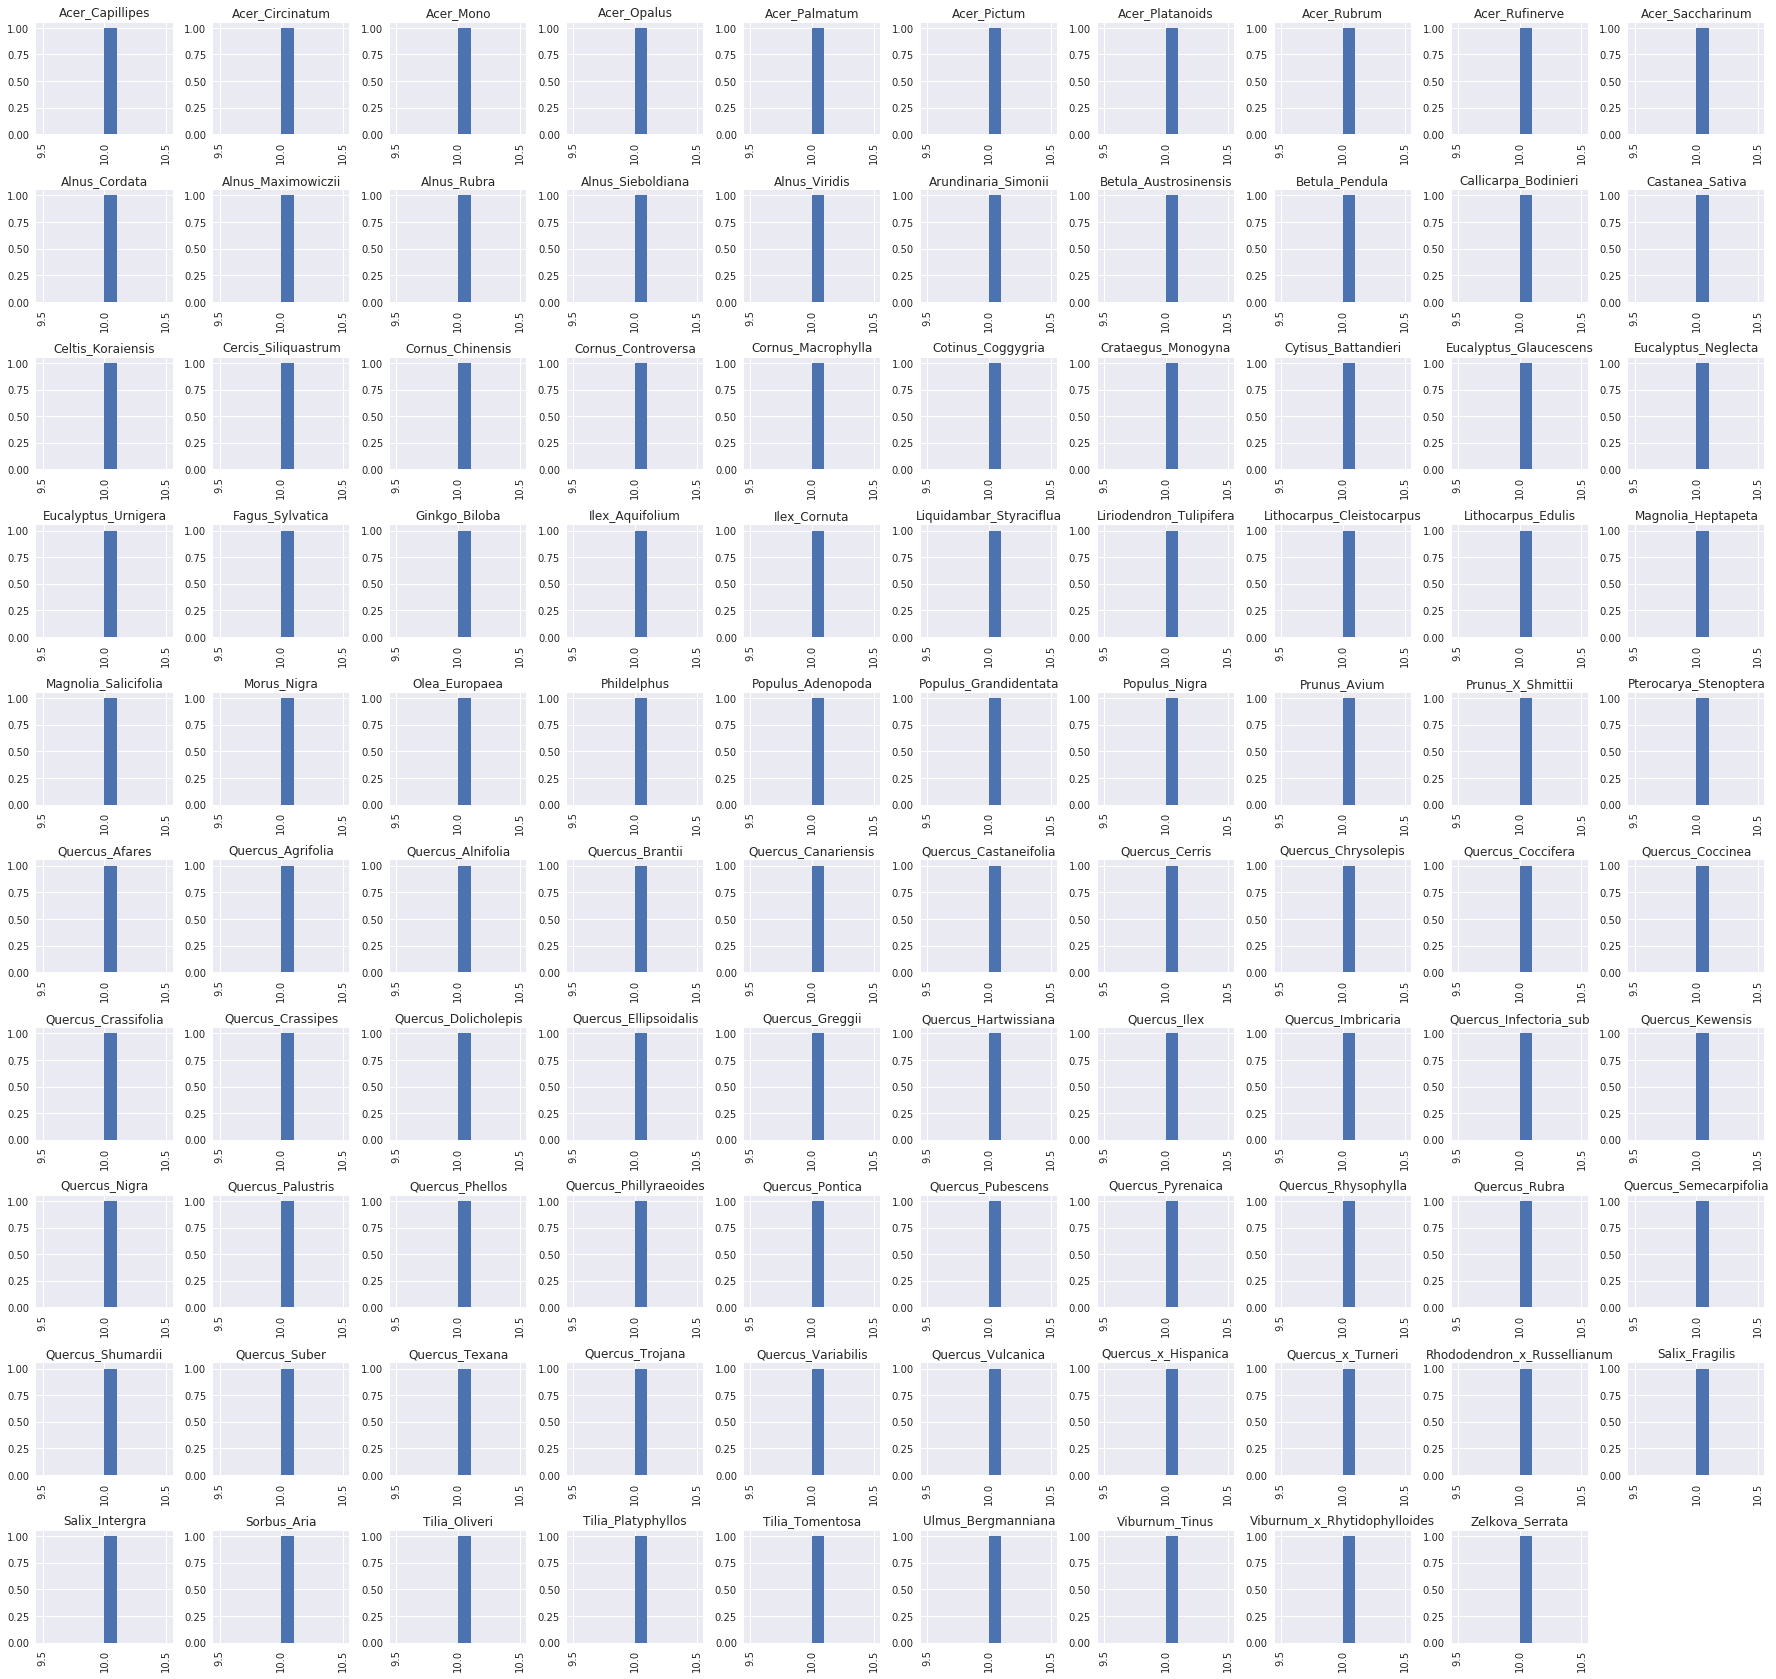

In [194]:
# On plot l'histogramme représentant la distribution de chaque espèce unique

dfs.hist(df['species'].unique(), bins=10, figsize=(30,30))
plt.show()

On voit bien que chaque espèce comptabilise 10 observations/individus.

Il est aussi possible de confirmer ce résultat arithmétiquement en divisant 990 (effectif total) par 99 (nombre d'espèces uniques) qui donne bien 10.

Qui plus est ces dernières semblent se structurer en familles (Acer..., Alnus...).

Dès lors il est intéressant de voir si la distributions des observations par famille est uniforme.

## 2 - Vérification de la distribution des observations par famille :

In [195]:
# Variable qui stock l'ensemble des oberservations par espèces
famille_all = dfs
# On décompose cet ensemble en la segmentant par type de famille
label_famille = famille_all.index.map(lambda x:x[0:x.find('_')])
# On crée une variable qui stocke les types de familles uniques
label_famille_uniques = label_famille.unique()

print('Nombre total de familles : {}'.format(len(label_famille_uniques)))

# On construit un premier dictionnaire stockant les labels uniques et une liste vide
dico = {k:[] for k in label_famille_uniques}

# Un deuxième dictionnaire qui va construire notre prochain dataframe qui comptabilise 
# le nombre d'espèces par famille
dicos = {k:[] for k in label_famille_uniques}

# On construit un dataframe à partir de la pandas.Serie famill_all
df2 = famille_all.to_frame().reset_index()
# On renomme notre colonne '0' par 'effectif'
df2 = df2.rename(columns= {0: 'effectif'})

Nombre total de familles : 34


In [196]:
# On remplit nos dictionnaires 
for v,i in dico.items():
    val = df2.species[df2['species'].str.contains(v)]
    # On ajoute le nombre de feuilles pour chaque famille
    dico[v].append(len(val) * 10)
    # On ajoute le nombre d'espèces pour chaque famille
    dicos[v].append(len(val))

In [197]:
# Dataframe qui comptabilise le nombre de feuilles (observations) par famille
df3 = pd.DataFrame(dico)

# Dataframe qui comptabilise le nombre d'espèces par famille
df4 = pd.DataFrame(dicos)  

### Nombre de feuilles par famille avec trie par ordre décroissant

In [198]:
# On applique un tri decroissant au nombre de feuilles par famille
df3_sorted = df3.sort_values(by=0, ascending=False, axis=1)
df3_sorted

,Quercus,Acer,Alnus,Eucalyptus,Tilia,Ilex,Cornus,Populus,Viburnum,Lithocarpus,...,Fagus,Cytisus,Crataegus,Cotinus,Cercis,Celtis,Castanea,Callicarpa,Arundinaria,Zelkova
0,380,100,50,30,30,30,30,30,20,20,...,10,10,10,10,10,10,10,10,10,10


### Classement des 3 premières familles (en terme d'effectifs de feuilles)

In [199]:
print('###### Top 3 : ######')
# On sélectionne les trois premières valeurs de notre dataframe trié par ordre décroissant.
# Il s'agit donc des trois plus hautes valeurs de ce dataframe.
top3 = df3_sorted[df3_sorted.columns[0:3]]
top3

###### Top 3 : ######


,Quercus,Acer,Alnus
0,380,100,50


La première famille (Quercus) a environ **4 fois plus d'observations (3.8 fois en réalité)**, que la deuxième famille (Acer), et environ **8 fois plus** que la troisième famille (Alnus).

La deuxième famille (Acer) a quand à elle **plus du double** du nombre d'observations que la troisième famille (Alnus)

On remarque donc ici que **les observations sont distribuées de manière particulièrement dispersée et inégale au sein de ces trois familles** qui sont dominantes en termes d'effectifs. 

### Nombre d'espèces par famille avec tri par ordre décroissant

In [200]:
# On applique un tri decroissant au nombre d'espèces par famille
df4_sorted = df4.sort_values(by=0, ascending=False, axis=1)
df4_sorted

,Quercus,Acer,Alnus,Eucalyptus,Tilia,Ilex,Cornus,Populus,Viburnum,Lithocarpus,...,Fagus,Cytisus,Crataegus,Cotinus,Cercis,Celtis,Castanea,Callicarpa,Arundinaria,Zelkova
0,38,10,5,3,3,3,3,3,2,2,...,1,1,1,1,1,1,1,1,1,1


## 3 - Visualisations  :

### A - Répartition des espèces :

### Histogramme de la répartition du nombre d'espèces  en fonction du nombre de familles :

<function matplotlib.pyplot.show>

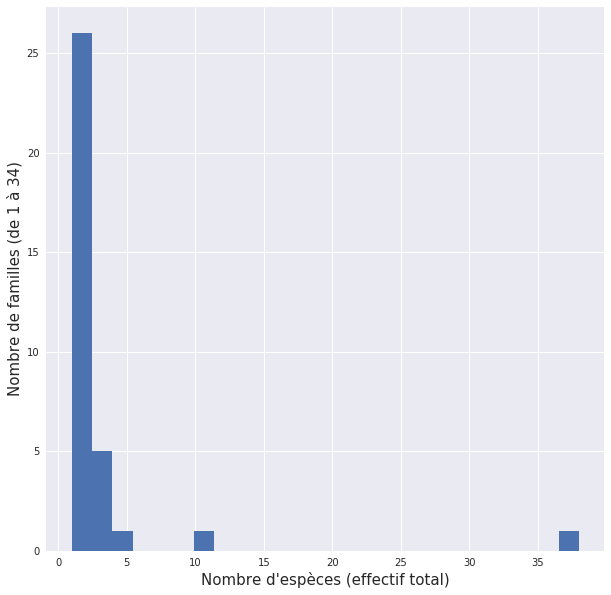

In [201]:
# On crée deux variables qui stockent les effectifs et les labels du dataframe des familles
xl = [i for i in df4.iloc[0]]
yl = [col for col in df4.columns]

# On définit la taille du graphique
plt.figure(figsize=(10,10))
# On plot l'histogramme en ajoutant des labels aux axes x et y
plt.hist(xl, bins=25)
plt.xlabel('Nombre d\'espèces (effectif total)', fontsize=15)
plt.ylabel('Nombre de familles (de 1 à 34)', fontsize=15)
plt.show

### Visualisation du nombre de feuilles par famille :

<function matplotlib.pyplot.show>

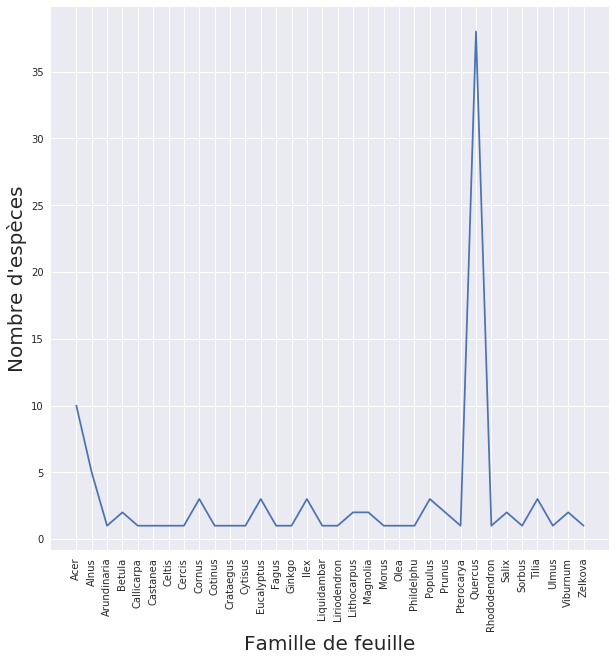

In [202]:
# On plot l'histogramme représentant la distribution de chaque espèce unique
plt.figure(figsize=(10,10))
plt.plot(yl, xl)
# On inverse la rotation des étiquelles afin de pouvoir visualiser l'intégralité des labels plus facilement
plt.xticks(rotation=90)
plt.xlabel('Famille de feuille', fontsize=20)
plt.ylabel('Nombre d\'espèces', fontsize=20)
plt.show

### B - Répartition des feuilles (observations) :

### Histogramme de la répartition du nombre de feuilles  en fonction du nombre de familles :

<function matplotlib.pyplot.show>

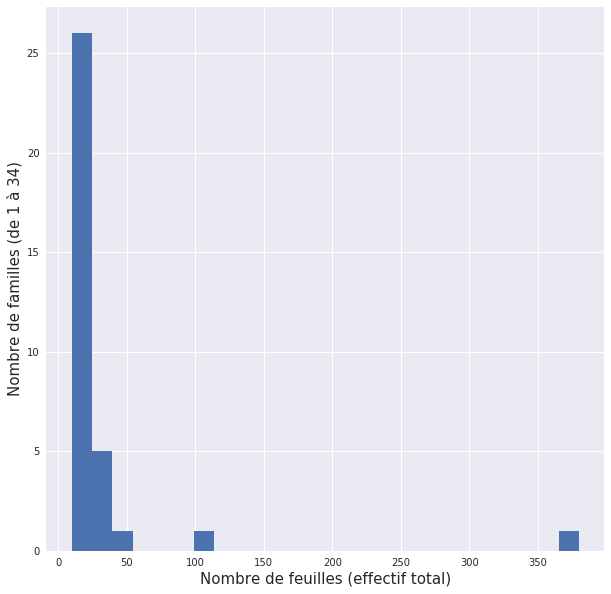

In [203]:
# On crée deux variables qui stockent les effectifs et les labels du dataframe des familles
x_l = [i for i in df3.iloc[0]]
y_l = [col for col in df3.columns]

# On définit la taille du graphique
plt.figure(figsize=(10,10))
# On plot l'histogramme en ajoutant des labels aux axes x et y
plt.hist(x_l, bins=25)
plt.xlabel('Nombre de feuilles (effectif total)', fontsize=15)
plt.ylabel('Nombre de familles (de 1 à 34)', fontsize=15)
plt.show

***Lecture de l'histogramme :***

1 - Les " 91% " :

- On voit ici que la majorité de la répartition est détenue par 31 (26 + 5) familles.

- Ces-dernières regroupent entre 10 à 30 feuilles par famille.

2 - Les " 9% " :

- Les 3 autres détiennent respectivement 50, 100, et 380 feuilles. 

### Visualisation du nombre de feuilles par famille :

<function matplotlib.pyplot.show>

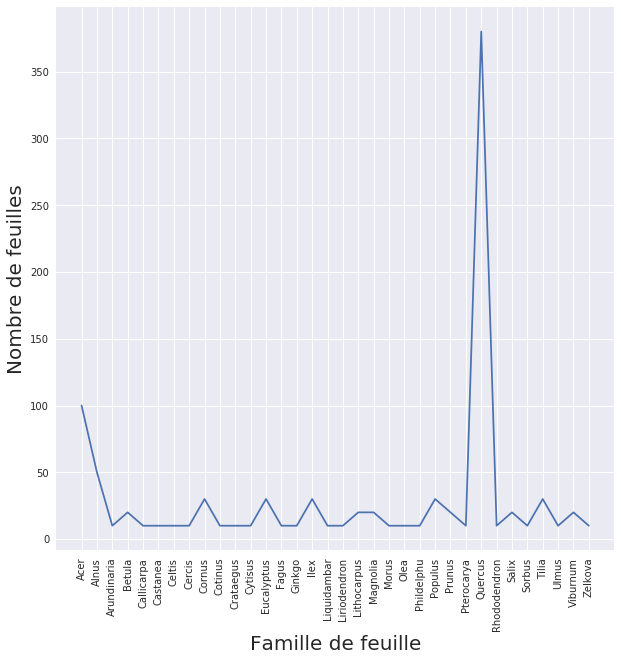

In [209]:
plt.figure(figsize=(10,10))
plt.plot(y_l, x_l)
# On inverse la rotation des étiquelles afin de pouvoir visualiser l'intégralité des labels plus facilement
plt.xticks(rotation=90)
plt.xlabel('Famille de feuille', fontsize=20)
plt.ylabel('Nombre de feuilles', fontsize=20)
plt.show

#### *Lecture du graphique :*

On voit donc ici que les effectifs des 34 familles ne sont pas distribués de manière uniforme.

En effet sur les 34 familles, **les 3 premières se répartissent 54% de la distribution totale**.

Les **31 autres se partagent donc 46%** du reste de cette distribution.

Autrement dit, **environ 9% des familles** captent **plus de la moitié des observations** (feuilles), et les **91% restant récupèrent l'autre moitiée**.

### C - Distribution des 192 variables (sans les variables 'species' et 'id') :

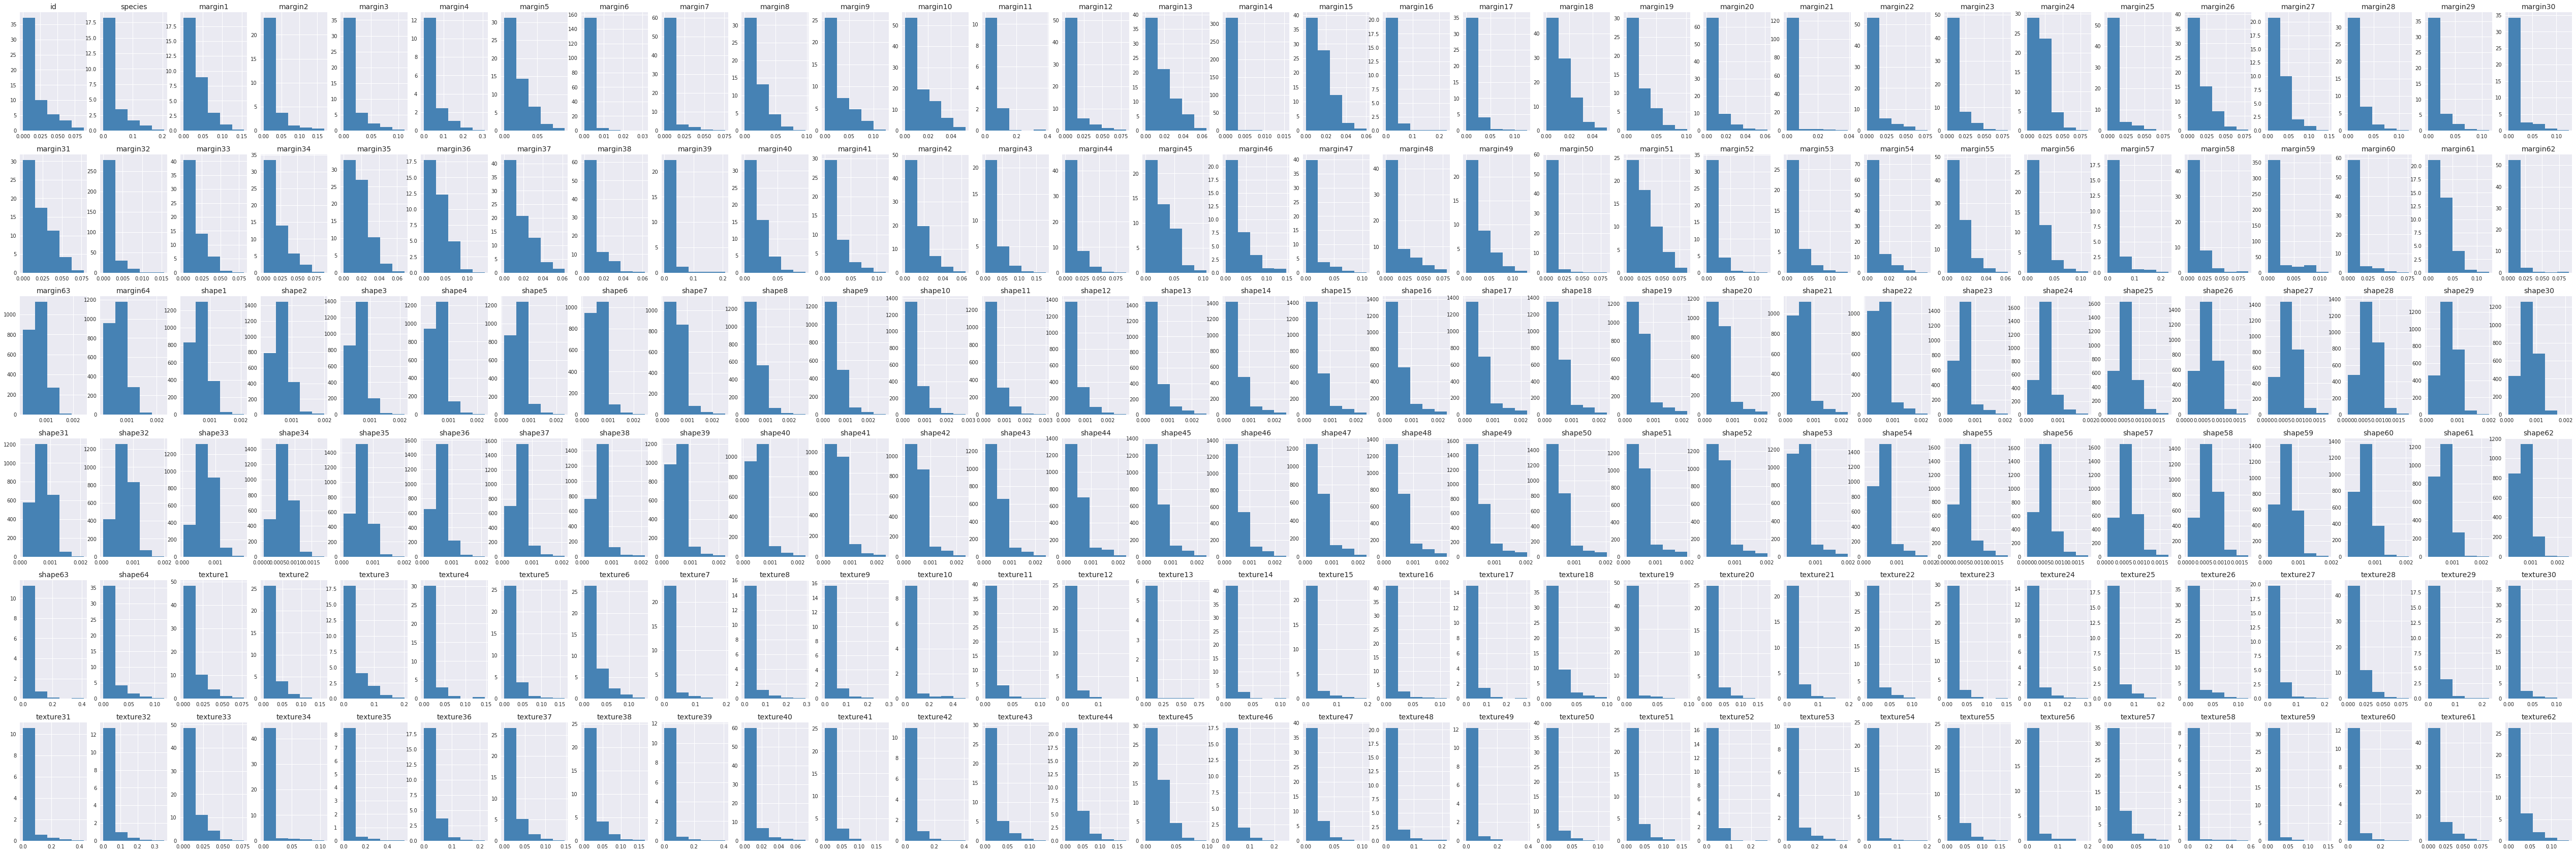

In [210]:
# Distribution des 192 variables 

fig = plt.figure(figsize=(90, 30))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(6,32, (feat_idx+1))
    h = ax.hist(X.iloc[:,feat_idx], bins=5, color='steelblue', normed=True, edgecolor='none')
    ax.set_title(df.columns[feat_idx], fontsize=14)


On voit donc ici que les distributions des 192 variables sont plutôt disparates.

Il est donc ici nécessaire de les standardiser à partir d'une normalisation par la moyenne et l'écart-type (std fixé à 1).

### D - BILAN RÉCAPITULATIF :
    
Nous avons donc :

- **990 feuilles** dans ce dataset.
- Elles sont répartient en **99 espèces uniques**.
- Chaque espèce regroupe **10 feuilles** (observations).
- On peut classifier ces espèces en **familles** qui sont au nombre de **34 au total**.

 

**1) Point critique 1 :**
    
-Chaque famille contient **un nombre variable de feuilles** (la distribution n'est donc plus uniforme ici)

On pourrait très bien ici essayer de stratifier notre dataset en faisant en sorte que chacune des 34 familles
comptabilise 10 feuilles.

(chiffre qui correspond à la valeur minimale des effectifs de feuilles par familles ) => **cf df4_sorted**

Cependant on considère que cette option risque de biaiser notre algorithme de manière significative puisque pour équilibrer de manière plus uniforme ce dataset, il faudrait nécessaire "supprimer" certaines espèces.

_Exemple :_

_La famille Quercus regroupe 38 espèces uniques._ 

_Il est donc impossible d'avoir seulement 10 feuilles pour celle-ci._

_(avec 1 feuille par espèce pour cette famille on arriverait en effet à 38 feuilles au total...)._


**Protocole alternatif :**

Une autre solution consisterait à étudier cette famille séparement, en l'écartant de notre dataset.

On pourrait donc très bien envisager de créer un autre dataset avec cette famille (Quercus) et ces espèces associées.

Il comptabiliserait alors 380 feuilles (lignes) avec toujours 194 variables (colonnes).

Ensuite il faudrait créer un second dataset qui regrouperait l'ensemble des autres familles et espèces (en excluant la famille Quercus et ses espèces associées).


On aurait donc au final deux datasets :

- Un premier dataset (df_Quercus) qui aurait  380 rows pour 194 columns.


- Un second dataset (df_other) qui aurait donc 610 rows pour 194 columns.


A partir de là, il ne reste plus qu'à stratifier les autres familles du second dataset, vu que l'échelle des effectifs (des espèces par famille) devient plus raisonnable (il va de 1 à 10).

On aurait donc pour la famille qui aurait le plus grand nombre d'espèces (Acer avec 10 espèces), une distribution de 1 feuille par espèce (on atteint donc 10 feuilles pour la famille).

Cependant pour les familles qui regroupent 3 espèces, on ne pourrait atteindre malheuresement que 9 feuilles par famille.

On doit donc garder à l'esprit ce biais dans notre algorithme (au vu de ce protocole qui reste imparfait).



**2) Point critique 2 :**

On remarque ici que les dataframes ont un nombre d'observations très différent (380 contre 610).
(l'écart entre les deux est de 62 %).
Néanmoins il est toujours possible d'étudier ces deux jeux de données et d'en tirer certaines conclusions qui ne doivent en aucun cas omettre la mention du protocole que nous avons ici suivi.


**Conclusion :**

On voit donc ici que l'on doit :

- **Normaliser** nos _features_ (les 192 variables correspondant à X )

- **Encoder** notre variable _species_ (y) qui est initialement codée sous un format de type _string_


# III - Normalisation des données (LabelEncoder & StandardScaler)

In [211]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

labelencoder = LabelEncoder()
standardscaler = StandardScaler()

# On standardise les 192 variables comme évoqué précédemment
X_std = standardscaler.fit_transform(X)
# On encode notre variable 'species' passant ainsi d'un format string à un format numérique calculable
y_encode = labelencoder.fit_transform(y)

### Découpage en training et testing sets :

In [212]:
from sklearn.model_selection import train_test_split
# On 'fige'le découpage via le paramètre random_state afin de garder un point de repère pour comparer
# nos modèles par la suite
X_train, X_test, y_train, y_test = train_test_split(X_std, y_encode, test_size=0.2, random_state=42)

# IV - Entraînement des différents modèles :

# A - k-NN :

## 1 - k-NN baseline

In [214]:
%%time
# Nous utiliserons ici souvent ce "magic parameter" qui permet de calculer le temps d'exécution d'une cellule
# Celà nous servira ici pour comparer la performance des différents modèles en fonction de ce paramètre temporel

# On importe le modèle de classification du k-NN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
# On entraîne notre k-NN baseline
knn.fit(X_train, y_train)

# On affiche les résultats ici sur le training set et le testing set, afin de voir si l'on se retrouve en situation 
# d'overfitting ou non. 
print('Score du knn baseline sur le training set : {}'.format(knn.score(X_train, y_train)))
print('Score du knn baseline sur le testing set : {}'.format(knn.score(X_test, y_test)))

Score du knn baseline sur le training set : 0.9785353535353535
Score du knn baseline sur le testing set : 0.9747474747474747
CPU times: user 268 ms, sys: 402 µs, total: 268 ms
Wall time: 267 ms


In [219]:
# On stock la variable score du knn baseline ainsi que deux variables temporelles qui nous servirons pour notre 
# évaluation des résultats obtenus
kbs = knn.score(X_test, y_test) * 100
t1 = '268 ms'
t1_bis = '00:00:268'

## 2 - k-NN avec optimisation des paramètres via GridSearchCV

In [216]:
# On importe cette fois-ci la fonction GridSearchCV qui va nous permettre d'optimiser nos modèles par la suite
from sklearn.model_selection import GridSearchCV

# On définit une grille de paramètres sous la forme d'un dictionnaire que l'on applique à la fonction GridSearchCV
param_knn = {'n_neighbors': np.arange(2, 16),
                   'metric':["euclidean","manhattan","chebyshev","minkowski"],
                   'weights' : ['uniform', 'distance']}

# On prend ici le nombre de folds 10 par défaut qui correspond à celui qui a été utilisé en TD
gknn = GridSearchCV(knn, param_knn, cv=10)

In [217]:
%%time
# On entraîne notre k-NN optimisé via GridSearchCV avec 10 CV
gknn.fit(X_train, y_train)

CPU times: user 3min 26s, sys: 55.9 ms, total: 3min 26s
Wall time: 3min 26s


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [218]:
print('Score du knn optimisé à 10cv sur le training set : {}'.format(gknn.score(X_train, y_train)))
print('Score du knn optimisé à 10cv sur le testing set : {}'.format(gknn.score(X_test, y_test)))

Score du knn optimisé à 10cv sur le training set : 1.0
Score du knn optimisé à 10cv sur le testing set : 0.9848484848484849


In [220]:
# On stock la variable score du knn optimisé via une GridSearchCV avec 10 folds
gks = gknn.score(X_test, y_test) * 100

t2 = '3min 26s'
t2_bis = '03:26:00'

# On affiche les meilleurs paramètres
gknn.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

## 3 - k-NN avec optimisation via GridSearchCV & boucle sur le nombre de folds

In [221]:
%%time
# Code optionnel permettant de vérifier que nous avons bien la meilleure accuracy en bouclant le modèle
# sur une liste de folds allant de 3 à 10.
# Le fold 2 a été supprimé car il est trop petit et constitue un biais potentiel quand à la généralisation du modèle.
# On mesure le temps d'execution de la cellule puisqu'on a beaucoup de combinaisons possibles ici

# On crée un dictionnaire qui contiendra l'ensemble des résultats (folds, paramètres, et scores obtenus)
best_score_knn = {'fold': [], 'param': [], 'accuracy': []}

# On définit une liste de folds allant de 3 à 10
folds = np.arange(3, 11)

# On itère sur cette liste de folds, et on entraîne notre modèle avec GridSearchCV avec un nombre de folds qui 
# est spécifique pour chaque itération
for f in folds:
    g2 = GridSearchCV(knn, param_knn, cv=f)
    g2.fit(X_train, y_train)
    score = g2.score(X_test, y_test)
    # On remplit notre dictionnaire 'bilan'
    best_score_knn['fold'].append(f)
    best_score_knn['param'].append(g2.best_params_)
    best_score_knn['accuracy'].append(score)
    
# On crée un dataframe à partir du dictionnaire précédent
df_knn = pd.DataFrame(best_score_knn)

# On filtre ce dataframe en fonction de l'accuracy la plus élevée
x_knn = df_knn.loc[df_knn['accuracy'].idxmax()]
# On affiche les différents résultats obtenus
print('####################################################################################')
print('##                   Voici les variables du modèle optimal                        ##')
print('####################################################################################')
print('- L\'accuracy optimale est {}'.format(x_knn[0]))
print('- Le meilleur paramètre est {}'.format(x_knn[2]))
print('- Le Fold optimal est {}'.format(x_knn[1]))

####################################################################################
##                   Voici les variables du modèle optimal                        ##
####################################################################################
- L'accuracy optimale est 0.9848484848484849
- Le meilleur paramètre est {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
- Le Fold optimal est 3
CPU times: user 16min 53s, sys: 242 ms, total: 16min 53s
Wall time: 16min 54s


In [222]:
# On stock la variable score du knn optimisé via une GridSearchCV et notre boucle for
gknnl = x_knn[0] * 100

t3 = '16min 53s'
t3_bis = '16:53:00'

# B - SVM :

## 1 - SVM baselines :

### 1.1 - SVM multiclass baseline avec approche par défaut 'ovr'

In [223]:
%%time
# On importe le modèle linéaire de notre classifieur SVC (d'une SVM multiclass)
from sklearn.svm import LinearSVC

# ON se retrouve ici dans le cas où l'on a plus d'observations (n) que de variables (p) 
# donc le paramètre dual vaut False (cf documentation de sklearn.svm.LinearSVC)
# A noter ici que le paramètre multi_class est fixé par défaut en OVR, on entraîne donc ici une SVM multiclasse avec 
# méthode OVR 
svm = LinearSVC(dual=False)

svm.fit(X_train, y_train)

print('Score du SVM baseline sur le training set : {}'.format(svm.score(X_train, y_train)))
print('Score du SVM baseline sur le testing set : {}'.format(svm.score(X_test, y_test)))

Score du SVM baseline sur le training set : 1.0
Score du SVM baseline sur le testing set : 0.9747474747474747
CPU times: user 11 s, sys: 3.27 ms, total: 11.1 s
Wall time: 11 s


In [224]:
# On stock la variable score de notre SVM baseline 'ovr'
svmbs = svm.score(X_test, y_test) * 100
t4 = '11.1 s'
t4_bis = '00:11:100'

### 1.2 - SVM multiclass baseline avec approche 'crammer singer'

In [225]:
%%time
# On change ici de paramètre pour l'option multi_class en choisit donc la seconde approche 
# qui est celle de Crammer et Singer
svmc = LinearSVC(dual=False, multi_class='crammer_singer')

svmc.fit(X_train, y_train)

print('Score du SVM baseline sur le training set : {}'.format(svmc.score(X_train, y_train)))
print('Score du SVM baseline sur le testing set : {}'.format(svmc.score(X_test, y_test)))

Score du SVM baseline sur le training set : 1.0
Score du SVM baseline sur le testing set : 0.9949494949494949
CPU times: user 639 ms, sys: 12.2 ms, total: 651 ms
Wall time: 636 ms


In [226]:
# On stock la variable score de notre SVM baseline 'crammer_singer'
svmbsc = svmc.score(X_test, y_test) * 100
t5 = '651 ms'
t5_bis = '00:00:651'

**Commentaire :**

On remarque ici que la SVM multiclass baseline avec le paramètre 'crammer singer' est plus rapide et plus performante !

On sélectionne donc ce paramètre pour la suite de notre démarche.

## 2 - SVM multiclass optimisées :

### 2.1 - SVM multiclass avec optimisation des paramètres via GridSearchCV (cv = 10)

In [227]:
# Liste de l'ensemble des paramètres à optimiser via GridSearchCV
param_svm = {'penalty': ['l1','l2'], 'C': np.logspace(-3, 3, 7), 'multi_class': ['crammer_singer'] }

In [228]:
%%time

gs_svm = GridSearchCV(svm, param_svm, cv=10)
gs_svm.fit(X_train, y_train)

CPU times: user 1min 35s, sys: 29.7 s, total: 2min 5s
Wall time: 1min 25s


In [229]:
print(gs_svm.best_params_)

{'C': 0.1, 'multi_class': 'crammer_singer', 'penalty': 'l1'}


In [230]:
print('Score du SVM optimisé sur le training set : {}'.format(gs_svm.score(X_train, y_train)))
print('Score du SVM optimisé sur le testing set : {}'.format(gs_svm.score(X_test, y_test)))

Score du SVM optimisé sur le training set : 1.0
Score du SVM optimisé sur le testing set : 0.9949494949494949


In [231]:
# On stock la variable score de notre SVM multiclass optimisée via une GridSearchCV avec 10 CV
gsvms = gs_svm.score(X_test, y_test) * 100
t6 = '2min 5s'
t6_bis = '02:05:00'

### 2.2 - SVM multiclass avec optimisation via GridSearchCV & boucle sur le nombre de folds

In [232]:
%%time

best_score_svm = {'fold': [], 'param': [], 'accuracy': []}

for f in folds:
    g3 = GridSearchCV(svm, param_svm, cv=f)
    g3.fit(X_train, y_train)
    score_svm = g3.score(X_test, y_test)
    best_score_svm['fold'].append(f)
    best_score_svm['param'].append(g3.best_params_)
    best_score_svm['accuracy'].append(score_svm)
    

df_svm = pd.DataFrame(best_score_svm)
x_svm = df_svm.loc[df_svm['accuracy'].idxmax()]
print('####################################################################################')
print('##                   Voici les variables du modèle optimal                        ##')
print('####################################################################################')
print('- L\'accuracy optimale est {}'.format(x_svm[0]))
print('- Le meilleur paramètre est {}'.format(x_svm[2]))
print('- Le Fold optimal est {}'.format(x_svm[1]))

####################################################################################
##                   Voici les variables du modèle optimal                        ##
####################################################################################
- L'accuracy optimale est 1.0
- Le meilleur paramètre est {'C': 0.01, 'multi_class': 'crammer_singer', 'penalty': 'l1'}
- Le Fold optimal est 9
CPU times: user 8min 9s, sys: 2min 32s, total: 10min 41s
Wall time: 7min 15s


In [233]:
# On stock la variable score de notre SVM multiclass optimisée via une GridSearchCV et notre boucle for
gsvmsl = x_svm[0] * 100

t7 = '10min 41s'
t7_bis = '10:41:00'

# V - Evaluation des performances :

Dans cette avant-dernière partie nous allons évaluer les performances de nos modèles de la façon suivante :

- Via l'adoption d'une approche globale qui réunit l'ensemble des déclinaisons des deux modèles (K-NN et SVM).


- Via l'adoption d'une approche plus ciblée qui étudie les résultats obtenus par ces deux modèles de manière séparée.


## 1 - Bilan global des performances des modèles 

In [234]:
# On crée une liste qui réunit l'ensemble des labels des modèles que nous avons entraînés
labels_modeles = ['K-NN baseline', 'K-NN optimisé 10CV', 'K-NN optimisé loop',
                   'SVM baseline ovr', 'SVM baseline crammer singer', 'SVM optimisé 10CV',
                  'SVM optimisé loop']

# On crée un dictionnaire qui regroupe les labels des modèles, leurs scores et leurs temps d'exécution 
dico_bilan_score = {'modèle': labels_modeles, 'Score': [kbs, gks, gknnl, svmbs, svmbsc, gsvms, gsvmsl],
                    'Temps d\'exécution': [t1, t2, t3, t4, t5, t6, t7]}

# On crée un dataframe qui reprend les variables de notre dictionnaire 
df_bilan_score = pd.DataFrame(dico_bilan_score)

df_bilan_score

,Score,Temps d'exécution,modèle
0,97.474747,268 ms,K-NN baseline
1,98.484848,3min 26s,K-NN optimisé 10CV
2,98.484848,16min 54s,K-NN optimisé loop
3,97.474747,11.1 s,SVM baseline ovr
4,99.494949,651 ms,SVM baseline crammer singer
5,99.494949,2min 5s,SVM optimisé 10CV
6,100.000000,10min 41s,SVM optimisé loop


In [235]:
# Conversion du temps d'exécution sous un format plus 'exploitable' numériquement (minute : seconde : milliseconde)

# En réalité les temps d'exécution on déjà été convertit au fur et à mesure de notre partie d'entraînement des modèles.
# Nous devons simplement ici les regrouper dans une liste comme effectué précédemment.
dico_bilan_score_bis = {'modèle': labels_modeles, 'Score': [kbs, gks, gknnl, svmbs, svmbsc, gsvms, gsvmsl],
                    'Temps d\'exécution (min:s:ms)': [t1_bis, t2_bis, t3_bis, t4_bis, t5_bis, t6_bis, t7_bis]}

df_bilan_score_bis = pd.DataFrame(dico_bilan_score_bis)

# On peut maintenant trier ces temps d'exécution plus facilement sous ce format
df_bilan_score_bis_sorted = df_bilan_score_bis.sort_values(['Temps d\'exécution (min:s:ms)'], ascending=True)
df_bilan_score_bis_sorted 

,Score,Temps d'exécution (min:s:ms),modèle
0,97.474747,00:00:268,K-NN baseline
4,99.494949,00:00:651,SVM baseline crammer singer
3,97.474747,00:11:100,SVM baseline ovr
5,99.494949,02:05:00,SVM optimisé 10CV
1,98.484848,03:26:00,K-NN optimisé 10CV
6,100.000000,10:41:00,SVM optimisé loop
2,98.484848,16:54:00,K-NN optimisé loop


### 1.1 - Visualisation des performances des modèles en fonction du score :

Text(0,0.5,'Accuracy')

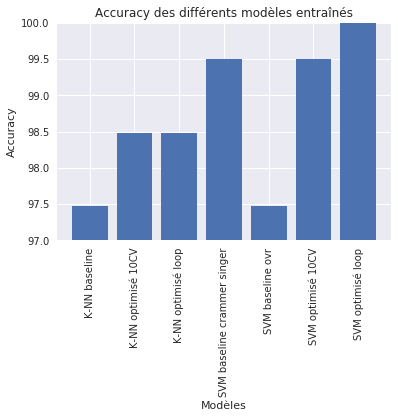

In [236]:
axe_x = df_bilan_score_bis_sorted['Score']
axe_y = df_bilan_score_bis_sorted['modèle']
# plt.plot( axe_y, axe_x, linestyle='--', marker='o')
plt.bar(axe_y, axe_x,)
plt.xticks(rotation=90)
plt.ylim([97, 100])
plt.title('Accuracy des différents modèles entraînés')
plt.xlabel('Modèles')
plt.ylabel('Accuracy')

### 1.2 - Visualisation des performances du modèle en fonction du temps de calcul :

Text(0.5,0,"Temps d'exécution (min:s:ms)")

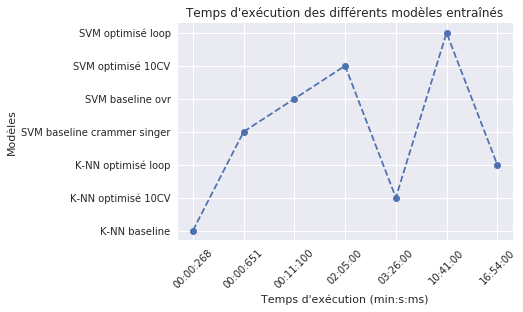

In [237]:
axe_x = df_bilan_score_bis_sorted['Temps d\'exécution (min:s:ms)']
axe_y = df_bilan_score_bis_sorted['modèle']
plt.plot( axe_x, axe_y, linestyle='--', marker='o')
plt.xticks(rotation=45)
plt.title('Temps d\'exécution des différents modèles entraînés')
plt.ylabel('Modèles')
plt.xlabel('Temps d\'exécution (min:s:ms)')

## 2 - Bilan ciblé des modèles par algorithmes (K-NN et SVM) :

In [238]:
# Construction des dataframes comparatifs pour chaque type de modèle 

# Liste de labels pour le modèle k-NN
labels_knn = ['k-NN baseline', 'k-NN optimisé 10CV', 'k-NN optimisé loop']

# Liste de labels pour le modèle SVM
labels_svm = ['SVM baseline methode 1 OVR', 'SVM baseline methode 2 Crammer Singer',
              'SVM optimisé 10CV', 'SVM optimisé loop']

# Dictionnaire pour le modèle k-NN
dico_knn = {'K-NN': labels_knn, 'Score_knn': [kbs, gks, gknnl], 'Time_knn (min/s/ms)': [t1_bis, t2_bis, t3_bis]}


# Dictionnaire pour le modèle SVM
dico_svm = {'SVM': labels_svm, 'Score_svm': [svmbs, svmbsc, gsvms, gsvmsl],
            'Time_svm (min/s/ms)': [t4_bis, t5_bis, t6_bis, t7_bis]}

# Dataframe pour le modèle k-NN
df_knn = pd.DataFrame(dico_knn)

# Dataframe pour le modèle SVM
df_svm = pd.DataFrame(dico_svm)

# On affiche le bilan des résultats pour le modèle k-NN
df_knn

,K-NN,Score_knn,Time_knn (min/s/ms)
0,k-NN baseline,97.474747,00:00:268
1,k-NN optimisé 10CV,98.484848,03:26:00
2,k-NN optimisé loop,98.484848,16:54:00


In [239]:
# On affiche le bilan des résultats pour le modèle SVM multiclass
df_svm

,SVM,Score_svm,Time_svm (min/s/ms)
0,SVM baseline methode 1 OVR,97.474747,00:11:100
1,SVM baseline methode 2 Crammer Singer,99.494949,00:00:651
2,SVM optimisé 10CV,99.494949,02:05:00
3,SVM optimisé loop,100.000000,10:41:00


### 2.1 - Visualisation des performances des modèles en fonction du score :

#### 1 - K-NN

Text(0,0.5,'Accuracy')

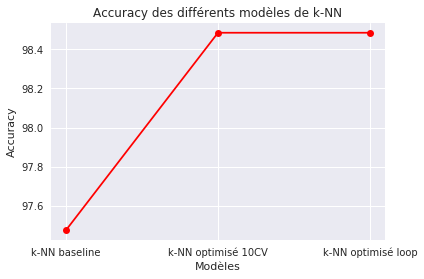

In [240]:
knn_x = df_knn['K-NN']
knn_y = df_knn['Time_knn (min/s/ms)']
knn_z = df_knn['Score_knn']
plt.plot(knn_x, knn_z, linestyle='-', marker='o', c='red')
# plt.plot(knn_x, knn_z, linestyle='-', marker='o', c='blue')
plt.title('Accuracy des différents modèles de k-NN')
plt.xlabel('Modèles')
plt.ylabel('Accuracy')

#### 2 - SVM multiclass

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

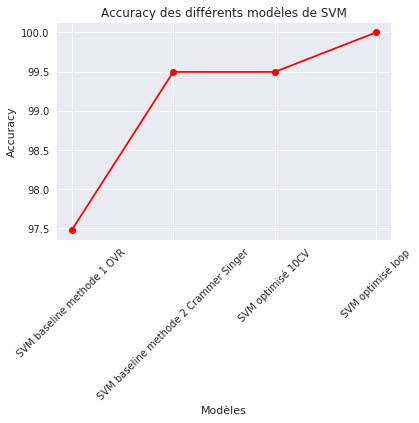

In [241]:
svm_x = df_svm['SVM']
svm_y = df_svm['Time_svm (min/s/ms)']
svm_z = df_svm['Score_svm']
plt.plot(svm_x, svm_z, linestyle='-', marker='o', c='red')
# plt.plot(knn_x, knn_z, linestyle='-', marker='o', c='blue')
plt.title('Accuracy des différents modèles de SVM')
plt.xlabel('Modèles')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

On observe donc ici deux dynamiques différentes :
- Le potentiel d'optimisation du k-NN semble stagner quelque soi le nombre de folds utilisés avec GridSearchCV
- Le cas contraire est observé pour la SVM multiclass. 
En effet son potentiel d'optimisation semble croître en fonction de l'optimisation du nombre de folds via la combinaison de GridSearchCV et d'une boucle sur une liste de folds.

### 2.2 - Visualisation des performances du modèle en fonction du temps de calcul :

#### 1 - K-NN :

Text(0,0.5,'Temps de calcul (min/s/ms)')

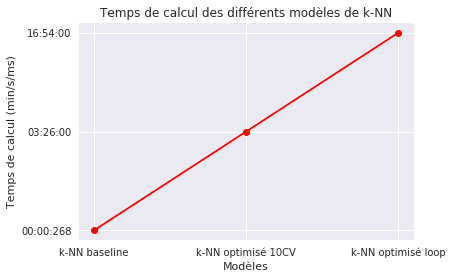

In [242]:
plt.plot(knn_x, knn_y, linestyle='-', marker='o', c='red')
plt.title('Temps de calcul des différents modèles de k-NN')
plt.xlabel('Modèles')
plt.ylabel('Temps de calcul (min/s/ms)')

#### 2 - SVM multiclass :

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

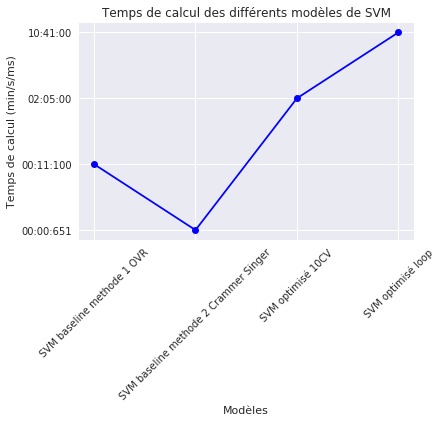

In [243]:
plt.plot(svm_x, svm_y, linestyle='-', marker='o', c='blue')
plt.title('Temps de calcul des différents modèles de SVM')
plt.xlabel('Modèles')
plt.ylabel('Temps de calcul (min/s/ms)')
plt.xticks(rotation=45)

In [245]:
df_knn

,K-NN,Score_knn,Time_knn (min/s/ms)
0,k-NN baseline,97.474747,00:00:268
1,k-NN optimisé 10CV,98.484848,03:26:00
2,k-NN optimisé loop,98.484848,16:54:00


# Rapport des performances et séléction du modèle :

## 1 - Bilan pour les modèles baselines :




- Le SVM baseline 'ovr' prend environ **11.1 secondes** de temps de calcul pour une precision de **97,5 %**


- Le SVM baseline 'crammer singer' prend environ **651 millisecondes** de temps de calcul pour une precision de **99,5 %**


- Le knn baseline prend environ **268 millisecondes** de temps de calcul pour une precision de **97.5 %**



## 2 - Bilan pour les modèles optimisés :



### Optimisation avec 10 cv :


- Le SVM multiclass optimisé prend environ **2 min (2 min et 5s)** de temps de calcul pour une precision de **99,5 %**


- Le knn optimisé prend environ **3 min (3 min et 26s)** de temps de calcul pour une precision de **98.5 %**

### Optimisation avec boucle sur une liste de folds :


- Le SVM multiclass optimisé prend **10 min et 41s** de temps de calcul pour une precision de **100 %** !  (le fold optimal est 9)


- Le knn optimisé prend environ **17 min (16 min et 54s)** de temps de calcul pour une precision de **98.5 %** (le fold optimal est inchangé)


# VI - Conclusion :

Selon le critère de sélection ici on ne choisira pas le même modèle :

- **Si c'est le temps de calcul :**  On sélectionnera la **SVM baseline multiclasse avec la méthode 'crammer singer'** qui a un temps de calcul qui est de l'ordre des **millisecondes**.

    N.B : (bien qu'elle soit un peu plus lente que le k-nn baseline, elle présente une _accuracy_ nettement plus élevée que celui-ci. On considére donc que ce modèle est le plus "rapide" considérant ce ratio de temps de calcul et _accuracy_). 


- **Si c'est l'accuracy :** On choisira alors un modèle optimisé en sélectionnant celui de la **SVM multiclasse optimisée** via l'utilisation conjointe de GridSearchCV et d'une boucle for appliquée à une liste de folds définie au préalable. Elle présente en effet une _accuracy_ de **100 %**.

**En résumé :**

Le modèle que nous choisissons ici correspond donc au **SVM multiclasse optimisé par GridSearchCV et boucle for sur une liste de folds**, car il présente la meilleure _accuracy_ (qui est de 100 % sur le testing test), et son temps de calcul de 10 minutes reste "envisageable" pour ce cas théorique. 


# ANNEXES :

Voici ci-dessous le code permettant de tester **l'ensemble des paramètres** d'une SVM linéaire multiclass via GridSearchCV et l'utilisation d'une boucle appliquée à une liste de folds que l'on a définit au préalable.

Lancer ce script prend environ **2 h 30 de temps de calculs**, on s'approche donc de la limite de l'<a href='https://openclassrooms.com/courses/initiez-vous-au-machine-learning/les-limites-du-machine-learning-no-free-lunch-et-intractability#/id/r-4092237'>**_intractability_**</a> ici....

C'est pourquoi il semble plus pertinent d'adopter une approche itérative comme vu précédemment afin d'affiner la sélection des paramètres optimaux au fur et à mesure de notre travail.

# Annexe 1 :

In [ ]:
%%time
# ATTENTION CE SCRIPT REQUIERT PLUS DE 2H 30 DE TEMPS DE CALCUL !!!

# Liste de l'ensemble des paramètres à optimiser via GridSearchCV
param_svm_all = {'penalty': ['l1','l2'], 'C': np.logspace(-3, 3, 7), 'multi_class': ['ovr', 'crammer_singer'] }

best_score_svm_all = {'fold': [], 'param': [], 'accuracy': []}

for f in folds:
    g3 = GridSearchCV(svm, param_svm_all, cv=f)
    g3.fit(X_train, y_train)
    score_svm = g3.score(X_test, y_test)
    best_score_svm_all['fold'].append(f)
    best_score_svm_all['param'].append(g3.best_params_)
    best_score_svm_all['accuracy'].append(score_svm)
    

df_svm_all = pd.DataFrame(best_score_svm_all)

x_svm_all = df_svm_all.loc[df_svm_all['accuracy'].idxmax()]
print('####################################################################################')
print('##                   Voici les variables du modèle optimal                        ##')
print('####################################################################################')
print('- L\'accuracy optimale est {}'.format(x_svm_all[0]))
print('- Le meilleur paramètre est {}'.format(x_svm_all[2]))
print('- Le Fold optimal est {}'.format(x_svm_all[1]))

# Annexe 2 :

In [156]:
#BONUS :

# Code permettant d'automatiser l'entrainement des deux modèles utilisés ici.
# On peut très bien intégrer d'autres modèles avec leurs listes de paramètres associés
def one_For_All(models, folds):
    # On définit ici un dictionnaire qui va nous servir de compte rendu bilan
    dico_all = {'model': [], 'fold': [], 'param': [], 'score': []}
    # On itère sur le dictionnaire des modèles qui contient aussi une clef avec leurs paramètres
    for mod, paramg in zip(models['algorithme'], models['parameters']):
        # Pour chaque folds on entraîne le modèle de la première boucle avec ses paramètres
        for fold in folds:
            # On applique une GridSearchCV au modèle concerné avec ses paramètres et le fold en question
            grid_pred = GridSearchCV(mod, paramg, cv=fold)
            grid_pred.fit(X_train, y_train)
            score_all = grid_pred.score(X_test, y_test)
            # On remplit ici les différentes clefs de notre dictionnaire
            dico_all['model'].append(mod)
            dico_all['fold'].append(fold)
            dico_all['param'].append(grid_pred.best_params_)
            dico_all['score'].append(score_all)
    # En sortie de boucle on crée un dataframe à partir de notre dictionnaire bilan
    df_model = pd.DataFrame(dico_all)
    # On filtre notre dataframe bilan en sélectionnant le modèle ayant le meilleur score
    x_model = df_model.loc[df_model['score'].idxmax()]

    return x_model


In [157]:
%%time

algorithms = {'algorithme': [knn, svm], 'parameters': [param_knn, param_svm]}

resultats_all = one_For_All(algorithms, folds)

CPU times: user 27min 12s, sys: 2min 16s, total: 29min 29s
Wall time: 26min 33s


In [246]:
resultats_all

fold                                                     9
model    LinearSVC(C=1.0, class_weight=None, dual=False...
param    {'C': 0.01, 'multi_class': 'crammer_singer', '...
score                                                    1
Name: 14, dtype: object

In [40]:
# Si on ne connait pas les labels exacts du dictionnaire (mais que l'ordre de celui-ci reste inchangé)
# On peut adopter ce style de boucle à la place

# Exemple :
for mod, paramg in zip(list(algorithms.values())[0], list(algorithms.values())[1]):
    print(paramg)

{'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'], 'weights': ['uniform', 'distance']}
{'penalty': ['l1', 'l2'], 'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'multi_class': ['crammer_singer']}
